# 코랩에서 옷입히기 구현
---
*필수 데이터 목록*

CLOTH
- 옷 이미지 : cloth (_1.jpg)
- 옷 마스크이미지 : cloth-mask (_1.jpg)

PERSON
- 사람 이미지 : image (_0.jpg)
- parse 이미지 : image-parse (_1.jpg)
- 키포인트 : pose (_keypoints.json -> people.pose_keypoints)

TEST IMAGE
- test_pairs.txt 타일에 이미지 명으로 pair





### 커스텀 데이터 적용 중 에러 저장
---
GMM
1. 테스트 폴더 안먹음
  - test.py -> `parser.add_argument("--datamode", default = "test")`
2. RuntimeError: output with shape [1, 68, 43] doesn't match the broadcast shape [3, 68, 43]
  - dataset.py -> `transforms.Normalize((0.5), (0.5))])`
3. RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 256 but got size 68 for tensor number 1 in the list.
  - 모든 이미지 사이즈는 (192,256)이다. dataset.py -> `im = im.resize((192, 256))` `im_parse = im_parse.resize((192, 256))`
4. RuntimeError: Given groups=1, weight of size [64, 22, 4, 4], expected input[1, 36, 256, 192] to have 22 channels, but got 36 channels instead
  - model.py -> `self.extractionA = FeatureExtraction(22, ngf=64, n_layers=3, norm_layer=nn.BatchNorm2d)` (22를 36으로)
5. warp 경로 이상하게 들어가는 문제
  - test.py -> `warp_cloth_dir = os.path.join(opt.dataroot, opt.datamode, 'warp-cloth')` (warp-mask도)

TOM
1. RuntimeError: Given groups=1, weight of size [64, 25, 4, 4], expected input[1, 39, 256, 192] to have 25 channels, but got 39 channels instead
  - test.py -> `model = UnetGenerator(39, 4, 6, ngf=64, norm_layer=nn.InstanceNorm2d)` (25에서 39로)
2. try-on 경로 이상하게 들어가는 문제
  - test.py -> `save_dir = os.path.join(opt.dataroot, opt.datamode)`  (warp 원복 하고 애초에 save-dir을 수정. gmm, tom 둘다 바꿔줘야 함)
3. 사람 이름이 아닌 옷 이름으로 저장
  - test.py -> `im_names = inputs['c_name'] #inputs['im_name']`


In [1]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.4 MB/s 


In [2]:
%cd /content/drive/MyDrive/AI_project/5. CP-VTON_maple/CP-VTON_sohyeon/CP-VTON_customdata_fixver

# 본인 최상단 폴더로 설정

/content/drive/MyDrive/AI_project/5. CP-VTON_maple/CP-VTON_sohyeon/CP-VTON_customdata_fixver


In [3]:
!pwd

/content/drive/MyDrive/AI_project/5. CP-VTON_maple/CP-VTON_sohyeon/CP-VTON_customdata_fixver


GMM

In [37]:
! python test.py --name gmm --stage GMM --workers 4 --datamode test --data_list test_pairs.txt --checkpoint checkpoints/gmm/gmm_final.pth

Namespace(batch_size=4, checkpoint='checkpoints/gmm/gmm_final.pth', data_list='test_pairs.txt', datamode='test', dataroot='data', display_count=1, fine_height=256, fine_width=192, gpu_ids='', grid_size=5, name='gmm', radius=5, result_dir='result', shuffle=False, stage='GMM', tensorboard_dir='tensorboard', workers=4)
Start to test stage: GMM, named: gmm!
*** train_dataset is DONE! ***
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
*** train_loader is DONE! ***
*** visualization code is DONE! ***
im torch.Size([3, 256, 192])
im torch.Size([3, 256, 192])
im torch.Size([3, 256, 192])
im t

TOM

In [5]:
! python test.py --name tom --stage TOM --workers 4 --datamode test --data_list test_pairs.txt --checkpoint checkpoints/tom/tom_final.pth

Namespace(batch_size=4, checkpoint='checkpoints/tom/tom_final.pth', data_list='test_pairs.txt', datamode='test', dataroot='data', display_count=1, fine_height=256, fine_width=192, gpu_ids='', grid_size=5, name='tom', radius=5, result_dir='result', shuffle=False, stage='TOM', tensorboard_dir='tensorboard', workers=4)
Start to test stage: TOM, named: tom!
*** train_dataset is DONE! ***
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
*** train_loader is DONE! ***
*** visualization code is DONE! ***
*** TOM model is Loaded! ***
Traceback (most recent call last):
  File "test.py", line 177,

### 이후 data/test/try-on 폴더에 결과 저장 😃

---

*참고용 타 코드 : https://github.com/minar09/cp-vton-plus*


| |  |  |
|:--:|:--:|:--:|
|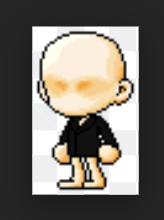| 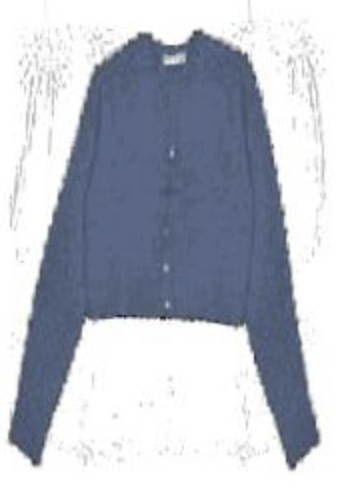  |  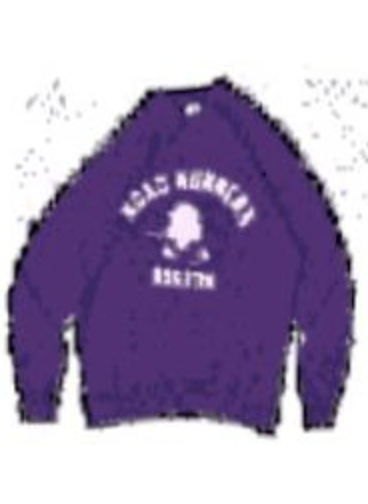 |